# Principle Component Analysis (PCA)

### Key Equation: $Ax = \lambda b ~~ \text{for} ~~ n \times n $

PCA is an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. This is an Unsupervised Learning Techniques - Which means we don't have a target variable.


In [179]:
import numpy as np
import pandas as pd

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

## 2 Variables

Let us generate a two variable data set - $x,y$

$$ y = 50 + 3x + \epsilon$$ 

In [181]:
np.random.seed(123)

In [182]:
x = np.arange(12, 56, 0.5)
e = np.random.normal(0, 100, x.size)
y = 500 + 20*x + e

In [183]:
input_2var = np.c_[x,y]

In [184]:
def plot2var (m, xlabel, ylabel):
    x = m[:,0]
    y = m[:,1]
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(x, y, s = 40, alpha = 0.8)
    sns.rugplot(x, color="m", ax=ax)
    sns.rugplot(y, color="m", vertical=True, ax=ax)
       
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

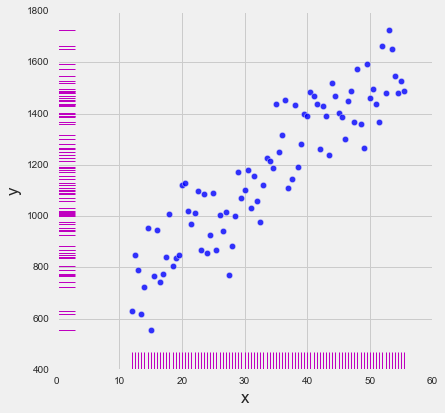

In [185]:
plot2var(input_2var, 'x', 'y')

**Centering the Variables** (Remove mean and divide by std dev)

In [186]:
input_2var_mean = np.mean(input_2var, axis=0)

In [187]:
input_2var_sd = np.std(input_2var, axis=0)

In [188]:
input_2var_center = np.subtract(input_2var, input_2var_mean) / input_2var_sd

In [189]:
input_2var_center.T

array([[-1.71247898, -1.67311165, -1.63374432, -1.59437698, -1.55500965,
        -1.51564232, -1.47627499, -1.43690765, -1.39754032, -1.35817299,
        -1.31880565, -1.27943832, -1.24007099, -1.20070366, -1.16133632,
        -1.12196899, -1.08260166, -1.04323432, -1.00386699, -0.96449966,
        -0.92513232, -0.88576499, -0.84639766, -0.80703033, -0.76766299,
        -0.72829566, -0.68892833, -0.64956099, -0.61019366, -0.57082633,
        -0.53145899, -0.49209166, -0.45272433, -0.413357  , -0.37398966,
        -0.33462233, -0.295255  , -0.25588766, -0.21652033, -0.177153  ,
        -0.13778567, -0.09841833, -0.059051  , -0.01968367,  0.01968367,
         0.059051  ,  0.09841833,  0.13778567,  0.177153  ,  0.21652033,
         0.25588766,  0.295255  ,  0.33462233,  0.37398966,  0.413357  ,
         0.45272433,  0.49209166,  0.53145899,  0.57082633,  0.61019366,
         0.64956099,  0.68892833,  0.72829566,  0.76766299,  0.80703033,
         0.84639766,  0.88576499,  0.92513232,  0.9

In [190]:
def plot2var_center (m, xlabel, ylabel):
    x = m[:,0]
    y = m[:,1]
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(x, y, s = 40, alpha = 0.8)
    sns.rugplot(x, color="m", ax=ax)
    sns.rugplot(y, color="m", vertical=True, ax=ax)
       
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xlim(-3,3)
    plt.ylim(-3,3)

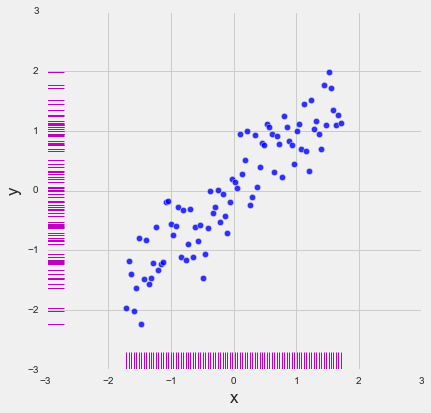

In [191]:
plot2var_center(input_2var_center, "x", "y")

**Calculate the Covariance Matrix** (Remove mean and divide by std dev)

In [192]:
cov_mat_2var = np.cov(input_2var_center.T)

In [193]:
cov_mat_2var

array([[ 1.01149425,  0.92226013],
       [ 0.92226013,  1.01149425]])

So now this is the symetric $A$ matrix we are trying to solve

$$ Ax = \lambda x $$

where 
$$ A = \begin{bmatrix} 1.01 & -0.92 \\ -0.92 & 1.01 \end{bmatrix} $$



**Lets get the eigen-vectors for this matrix**

In [194]:
eigen_val_2var, eigen_vec_2var = np.linalg.eig(cov_mat_2var)

In [195]:
eigen_val_2var

array([ 1.93375438,  0.08923413])

In [196]:
eigen_vec_2var

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [197]:
eigen_vec_2var[1].dot(eigen_vec_2var[0])

0.0

So our eigen vectors and eigen values are:
$$ \lambda_1 = 1.93, \lambda_2 = 0.09 $$

$$ \vec{v_1} = \begin{bmatrix} 0.707 \\ -0.707\end{bmatrix} $$

$$ \vec{v_2} = \begin{bmatrix}  0.707 \\  0.707\end{bmatrix} $$

These are orthogonal to each other. Let us plots to see these eigen vectors


In [243]:
def plot2var_eigen (m, xlabel, ylabel):
    x = m[:,0]
    y = m[:,1]
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(x, y, s = 40, alpha = 0.8)
    sns.rugplot(x, color="m", ax=ax)
    sns.rugplot(y, color="m", vertical=True, ax=ax)
       
    cov_mat = np.cov(m.T)
    eigen_val, eigen_vec = np.linalg.eig(cov_mat)
    
    plt.quiver(eigen_vec[0, 0], eigen_vec[0, 1], angles='xy', scale_units='xy', scale=1, color='brown')
    plt.quiver(eigen_vec[1, 0], eigen_vec[1, 1], angles='xy', scale_units='xy', scale=1, color='brown')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xlim(-3,3)
    plt.ylim(-3,3)

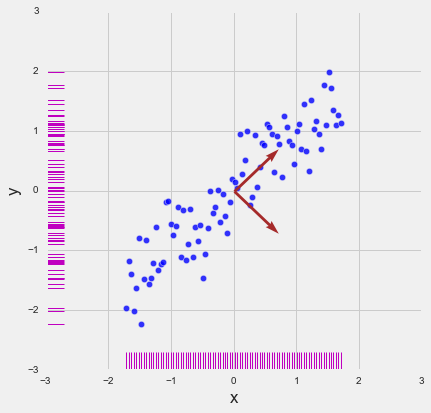

In [244]:
plot2var_eigen(input_2var_center, 'x' ,'y')

Let us project our orginal values to see the new results

In [200]:
input_2var_center.T

array([[-1.71247898, -1.67311165, -1.63374432, -1.59437698, -1.55500965,
        -1.51564232, -1.47627499, -1.43690765, -1.39754032, -1.35817299,
        -1.31880565, -1.27943832, -1.24007099, -1.20070366, -1.16133632,
        -1.12196899, -1.08260166, -1.04323432, -1.00386699, -0.96449966,
        -0.92513232, -0.88576499, -0.84639766, -0.80703033, -0.76766299,
        -0.72829566, -0.68892833, -0.64956099, -0.61019366, -0.57082633,
        -0.53145899, -0.49209166, -0.45272433, -0.413357  , -0.37398966,
        -0.33462233, -0.295255  , -0.25588766, -0.21652033, -0.177153  ,
        -0.13778567, -0.09841833, -0.059051  , -0.01968367,  0.01968367,
         0.059051  ,  0.09841833,  0.13778567,  0.177153  ,  0.21652033,
         0.25588766,  0.295255  ,  0.33462233,  0.37398966,  0.413357  ,
         0.45272433,  0.49209166,  0.53145899,  0.57082633,  0.61019366,
         0.64956099,  0.68892833,  0.72829566,  0.76766299,  0.80703033,
         0.84639766,  0.88576499,  0.92513232,  0.9

In [201]:
eigen_vec_2var

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [202]:
input_2var_center.T.shape

(2, 88)

In [203]:
eigen_vec_2var.shape

(2, 2)

In [204]:
output_2var_projection = eigen_vec_2var.dot(input_2var_center.T)

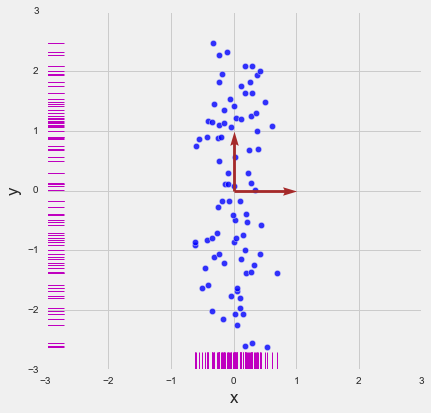

In [245]:
plot2var_eigen(output_2var_projection.T, 'x' ,'y')

## Exercise  - No Centering

Re-run the PCA analysis on the same dataset without centering

## Exercise - Iris Dataset (4 Dimensions)

Run PCA with 2 dimensions on the iris dataset from the sklearn

In [224]:
from sklearn import datasets

In [225]:
iris = datasets.load_iris()

In [226]:
X = iris.data

How do you select which 2 axis to choose?

## PCA using sklearn

In [227]:
from sklearn.decomposition import PCA

In [228]:
pca = PCA(n_components=2)

In [229]:
pca.fit(input_2var_center)

PCA(copy=True, n_components=2, whiten=False)

In [230]:
output_2var = pca.transform(input_2var_center)

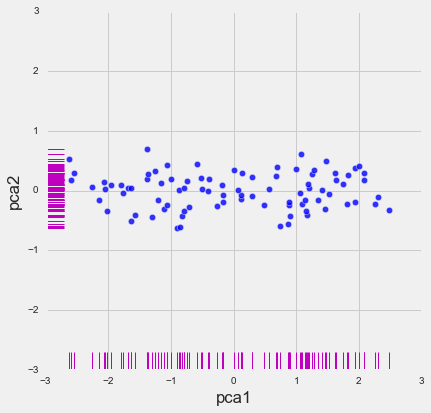

In [231]:
plot2var_center(output_2var, 'pca1', 'pca2')